In [0]:
import warnings
warnings.filterwarnings("ignore")

from keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import losses, optimizers

import matplotlib.pyplot as plt


# Challenge
In this module, we introduced the basics of deep learning and the fundamental architecture of the artificial neural networks. During the examples in the checkpoints, we used a MNIST dataset. In this challenge, you'll work with another dataset called fashion MNIST. Using this dataset, you need to:

1. Preprocess your data so that you can feed it into ANN models.
2. Split your data into training and test sets.
Try different ANN models and train them on your training set. You can play with: 
  * 3.1. Number of layers.
  * 3.2. Activation functions of the layers.
  * 3.3. Number of neurons in the layers.
  * 3.4. Different batch sizes during training.

3. Compare your models' training scores and interpret your results.
4. Evaluate your models' performances on your test set. Compare the results of your models.

Please submit your solutions to the following tasks as a link to your Jupyter notebook on GitHub.

### Data

In [2]:
# Loading data and preprocessing
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### Processing

In [0]:
input_dim = 784  # 28*28
output_dim = nb_classes = 10
batch_size = 128
nb_epoch = 20

X_train = X_train.reshape(60000, input_dim)
X_test = X_test.reshape(10000, input_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
# Hot encoding through Keras
Y_train_hot = to_categorical(y_train, nb_classes)
Y_test_hot = to_categorical(y_test, nb_classes)

In [6]:
# Checking the size of the data
X_train[0].shape

(784,)

### Plotting

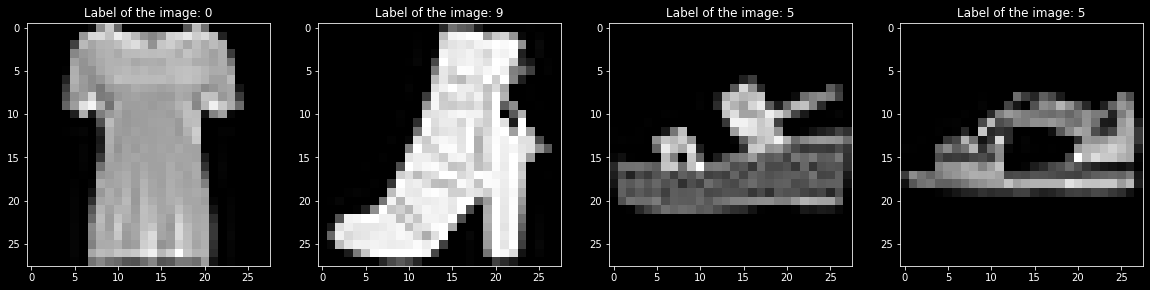

In [9]:
plt.figure(figsize=(20,5))
plt.style.use('dark_background')

plt.subplot(141)
plt.imshow(X_train[10].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[10]))

plt.subplot(142)
plt.imshow(X_train[11].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[11]))

plt.subplot(143)
plt.imshow(X_train[12].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[12]))

plt.subplot(144)
plt.imshow(X_train[13].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[13]))

plt.show()

## Modeling

Let's start with a smaller NN like in the previous notebooks (expanding if necessary based on performance), and we will also begin with adjusting the activation function.

In [10]:
# 3-layer ANN with 128, 64, 10, using tanh
model = Sequential()
# our first dense layer
model.add(Dense(128, input_shape=(784,), activation="tanh"))
# our second dense layer
model.add(Dense(64, activation="tanh"))
# our third dense layer
model.add(Dense(10, activation="softmax"))

# Compiling the model
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training model
model.fit(X_train, Y_train_hot, batch_size=batch_size, epochs=20, verbose=1)

# Evaluating the model
score = model.evaluate(X_test, Y_test_hot, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
469/469 [==============================] - 2s 3ms/step - loss: 1.0576 - accuracy: 0.6718
Epoch 2/20
469/469 [==============================] - 2s 3ms/step - loss: 0.6675 - accuracy: 0.7840
Epoch 3/20
469/469 [==============================] - 2s 3ms/step - loss: 0.5764 - accuracy: 0.8077
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 0.5295 - accuracy: 0.8196
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.5002 - accuracy: 0.8284
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.4794 - accuracy: 0.8331
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.4636 - accuracy: 0.8379
Epoch 8/20
469/469 [==============================] - 1s 3ms/step - loss: 0.4506 - accuracy: 0.8425
Epoch 9/20
469/469 [==============================] - 2s 3ms/step - loss: 0.4401 - accuracy: 0.8455
Epoch 10/20
469/469 [==============================] - 2s 3ms/step - loss: 0.4313 - accuracy: 0.8478

In [12]:
# 3-layer ANN with 128, 64, 10, using relu
model = Sequential()
# our first dense layer
model.add(Dense(128, input_shape=(784,), activation="relu"))
# our second dense layer
model.add(Dense(64, activation="relu"))
# our third dense layer
model.add(Dense(10, activation="softmax"))

# Compiling the model
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training model
model.fit(X_train, Y_train_hot, batch_size=batch_size, epochs=20, verbose=1)

# Evaluating the model
score = model.evaluate(X_test, Y_test_hot, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
469/469 [==============================] - 2s 3ms/step - loss: 1.1106 - accuracy: 0.6546
Epoch 2/20
469/469 [==============================] - 2s 3ms/step - loss: 0.6522 - accuracy: 0.7839
Epoch 3/20
469/469 [==============================] - 2s 3ms/step - loss: 0.5660 - accuracy: 0.8091
Epoch 4/20
469/469 [==============================] - 2s 3ms/step - loss: 0.5215 - accuracy: 0.8220
Epoch 5/20
469/469 [==============================] - 2s 3ms/step - loss: 0.4965 - accuracy: 0.8278
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.4767 - accuracy: 0.8346
Epoch 7/20
469/469 [==============================] - 2s 3ms/step - loss: 0.4625 - accuracy: 0.8390
Epoch 8/20
469/469 [==============================] - 2s 3ms/step - loss: 0.4501 - accuracy: 0.8436
Epoch 9/20
469/469 [==============================] - 2s 3ms/step - loss: 0.4401 - accuracy: 0.8472
Epoch 10/20
469/469 [==============================] - 2s 3ms/step - loss: 0.4323 - accuracy: 0.8500

In [14]:
# 1. 3-layer ANN with 128, 64, 10, using leaky relu
model = Sequential()
# our first dense layer
model.add(Dense(128, input_shape=(784,)))
model.add(LeakyReLU(alpha=0.3))
# our second dense layer
model.add(Dense(64,))
model.add(LeakyReLU(alpha=0.3))
# our third dense layer
model.add(Dense(10, activation="softmax"))

# Compiling the model
model.compile(optimizer='sgd', loss='categorical_hinge',
              metrics=['accuracy'])

# Training the Model
model.fit(X_train, Y_train_hot, batch_size=batch_size, epochs=20, verbose=1)

# Evaluating the model
score = model.evaluate(X_test, Y_test_hot, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
469/469 [==============================] - 2s 3ms/step - loss: 0.9976 - accuracy: 0.4184
Epoch 2/20
469/469 [==============================] - 2s 3ms/step - loss: 0.8332 - accuracy: 0.6072
Epoch 3/20
469/469 [==============================] - 2s 3ms/step - loss: 0.6773 - accuracy: 0.6760
Epoch 4/20
469/469 [==============================] - 2s 3ms/step - loss: 0.5994 - accuracy: 0.7089
Epoch 5/20
469/469 [==============================] - 2s 3ms/step - loss: 0.5477 - accuracy: 0.7560
Epoch 6/20
469/469 [==============================] - 2s 3ms/step - loss: 0.4999 - accuracy: 0.7857
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.4625 - accuracy: 0.7967
Epoch 8/20
469/469 [==============================] - 2s 4ms/step - loss: 0.4357 - accuracy: 0.8054
Epoch 9/20
469/469 [==============================] - 2s 4ms/step - loss: 0.4165 - accuracy: 0.8107
Epoch 10/20
469/469 [==============================] - 2s 3ms/step - loss: 0.4012 - accuracy: 0.8166

The ReLU activation function appears to work best.

---
<br></br>
## Loss Functions


In [16]:
# 3-layer ANN with 128, 64, 10, using relu and hinge loss
model = Sequential()
# our first dense layer
model.add(Dense(128, input_shape=(784,), activation="relu"))
# our second dense layer
model.add(Dense(64, activation="relu"))
# our third dense layer
model.add(Dense(10, activation="softmax"))

# Compiling the model
model.compile(optimizer='sgd', loss='categorical_hinge',
              metrics=['accuracy'])

# Training model
model.fit(X_train, Y_train_hot, batch_size=batch_size, epochs=20, verbose=1)

# Evaluating the model
score = model.evaluate(X_test, Y_test_hot, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
469/469 [==============================] - 1s 3ms/step - loss: 1.0004 - accuracy: 0.3818
Epoch 2/20
469/469 [==============================] - 2s 3ms/step - loss: 0.8989 - accuracy: 0.5468
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.7496 - accuracy: 0.6316
Epoch 4/20
469/469 [==============================] - 2s 3ms/step - loss: 0.6552 - accuracy: 0.6908
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.5933 - accuracy: 0.7356
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.5395 - accuracy: 0.7658
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.4946 - accuracy: 0.7855
Epoch 8/20
469/469 [==============================] - 2s 4ms/step - loss: 0.4616 - accuracy: 0.7981
Epoch 9/20
469/469 [==============================] - 2s 4ms/step - loss: 0.4371 - accuracy: 0.8059
Epoch 10/20
469/469 [==============================] - 2s 4ms/step - loss: 0.4178 - accuracy: 0.8125

In [18]:
# 3-layer ANN with 128, 64, 10, using relu and SparseCategoricalCrossentropy
model = Sequential()
# our first dense layer
model.add(Dense(128, input_shape=(784,), activation="relu"))
# our second dense layer
model.add(Dense(64, activation="relu"))
# our third dense layer
model.add(Dense(10, activation="softmax"))

# Compiling the model
model.compile(optimizer='sgd', loss=losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Training model
model.fit(X_train, y_train, epochs=20, verbose=1)

# Evaluating the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7317 - accuracy: 0.7596
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4953 - accuracy: 0.8257
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4499 - accuracy: 0.8423
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4232 - accuracy: 0.8513
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4044 - accuracy: 0.8577
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3887 - accuracy: 0.8630
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3763 - accuracy: 0.8679
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3646 - accuracy: 0.8715
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3528 - accuracy: 0.8748
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.344

Sparse Categorical Crossentropy is the best performing loss function.

---
<br></br>
# Batch Size

In [22]:
# 3-layer ANN with 128, 64, 10, using relu, SparseCategoricalCrossentropy, and batch size 64
model = Sequential()
# our first dense layer
model.add(Dense(128, input_shape=(784,), activation="relu"))
# our second dense layer
model.add(Dense(64, activation="relu"))
# our third dense layer
model.add(Dense(10, activation="softmax"))

# Compiling the model
model.compile(optimizer='sgd', loss=losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Training model
model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1)

# Evaluating the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
469/469 [==============================] - 1s 3ms/step - loss: 1.2067 - accuracy: 0.6189
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.6912 - accuracy: 0.7698
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.5930 - accuracy: 0.8011
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 0.5443 - accuracy: 0.8154
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.5131 - accuracy: 0.8245
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.4935 - accuracy: 0.8296
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.4763 - accuracy: 0.8351
Epoch 8/20
469/469 [==============================] - 1s 3ms/step - loss: 0.4653 - accuracy: 0.8379
Epoch 9/20
469/469 [==============================] - 1s 3ms/step - loss: 0.4539 - accuracy: 0.8424
Epoch 10/20
469/469 [==============================] - 1s 3ms/step - loss: 0.4447 - accuracy: 0.8453

In [21]:
# 3-layer ANN with 128, 64, 10, using relu, SparseCategoricalCrossentropy, and batch size 64
model = Sequential()
# our first dense layer
model.add(Dense(128, input_shape=(784,), activation="relu"))
# our second dense layer
model.add(Dense(64, activation="relu"))
# our third dense layer
model.add(Dense(10, activation="softmax"))

# Compiling the model
model.compile(optimizer='sgd', loss=losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Training model
model.fit(X_train, y_train, batch_size=64, epochs=20, verbose=1)

# Evaluating the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
938/938 [==============================] - 2s 2ms/step - loss: 0.8944 - accuracy: 0.7171
Epoch 2/20
938/938 [==============================] - 2s 2ms/step - loss: 0.5535 - accuracy: 0.8108
Epoch 3/20
938/938 [==============================] - 2s 2ms/step - loss: 0.4959 - accuracy: 0.8281
Epoch 4/20
938/938 [==============================] - 2s 2ms/step - loss: 0.4652 - accuracy: 0.8391
Epoch 5/20
938/938 [==============================] - 2s 2ms/step - loss: 0.4451 - accuracy: 0.8448
Epoch 6/20
938/938 [==============================] - 2s 2ms/step - loss: 0.4285 - accuracy: 0.8500
Epoch 7/20
938/938 [==============================] - 2s 2ms/step - loss: 0.4164 - accuracy: 0.8537
Epoch 8/20
938/938 [==============================] - 2s 2ms/step - loss: 0.4039 - accuracy: 0.8584
Epoch 9/20
938/938 [==============================] - 2s 2ms/step - loss: 0.3938 - accuracy: 0.8617
Epoch 10/20
938/938 [==============================] - 2s 2ms/step - loss: 0.3858 - accuracy: 0.8652

In [23]:
# 3-layer ANN with 128, 64, 10, using relu, SparseCategoricalCrossentropy, and batch size 16
model = Sequential()
# our first dense layer
model.add(Dense(128, input_shape=(784,), activation="relu"))
# our second dense layer
model.add(Dense(64, activation="relu"))
# our third dense layer
model.add(Dense(10, activation="softmax"))

# Compiling the model
model.compile(optimizer='sgd', loss=losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Training model
model.fit(X_train, y_train, batch_size=16, epochs=20, verbose=1)

# Evaluating the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.6266 - accuracy: 0.7856
Epoch 2/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.4461 - accuracy: 0.8439
Epoch 3/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.4017 - accuracy: 0.8563
Epoch 4/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.3753 - accuracy: 0.8653
Epoch 5/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.3566 - accuracy: 0.8712
Epoch 6/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.3411 - accuracy: 0.8775
Epoch 7/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.3274 - accuracy: 0.8818
Epoch 8/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.3169 - accuracy: 0.8848
Epoch 9/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.3074 - accuracy: 0.8897
Epoch 10/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.298

# Learning Rate

In [0]:
sgd_01 = optimizers.SGD(lr=0.1)
sgd_001 = optimizers.SGD(lr=0.01)
sgd_0001 = optimizers.SGD(lr=0.001)

In [31]:
# 3-layer ANN with 128, 64, 10, using relu, SparseCategoricalCrossentropy, batch size 16, learning rate .1
model = Sequential()
# our first dense layer
model.add(Dense(128, input_shape=(784,), activation="relu"))
# our second dense layer
model.add(Dense(64, activation="relu"))
# our third dense layer
model.add(Dense(10, activation="softmax"))

# Compiling the model
model.compile(optimizer=sgd_01, loss=losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Training model
model.fit(X_train, y_train, batch_size=64, epochs=20, verbose=1)

# Evaluating the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
938/938 [==============================] - 2s 2ms/step - loss: 0.5852 - accuracy: 0.7897
Epoch 2/20
938/938 [==============================] - 2s 2ms/step - loss: 0.4135 - accuracy: 0.8490
Epoch 3/20
938/938 [==============================] - 2s 2ms/step - loss: 0.3718 - accuracy: 0.8634
Epoch 4/20
938/938 [==============================] - 2s 2ms/step - loss: 0.3448 - accuracy: 0.8745
Epoch 5/20
938/938 [==============================] - 2s 2ms/step - loss: 0.3252 - accuracy: 0.8796
Epoch 6/20
938/938 [==============================] - 2s 2ms/step - loss: 0.3088 - accuracy: 0.8856
Epoch 7/20
938/938 [==============================] - 2s 2ms/step - loss: 0.2970 - accuracy: 0.8909
Epoch 8/20
938/938 [==============================] - 2s 2ms/step - loss: 0.2853 - accuracy: 0.8946
Epoch 9/20
938/938 [==============================] - 2s 2ms/step - loss: 0.2768 - accuracy: 0.8977
Epoch 10/20
938/938 [==============================] - 2s 2ms/step - loss: 0.2660 - accuracy: 0.9010

In [26]:
# 3-layer ANN with 128, 64, 10, using relu, SparseCategoricalCrossentropy, batch size 16, learning rate .01
model = Sequential()
# our first dense layer
model.add(Dense(128, input_shape=(784,), activation="relu"))
# our second dense layer
model.add(Dense(64, activation="relu"))
# our third dense layer
model.add(Dense(10, activation="softmax"))

# Compiling the model
model.compile(optimizer=sgd_001, loss=losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Training model
model.fit(X_train, y_train, batch_size=16, epochs=20, verbose=1)

# Evaluating the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.6269 - accuracy: 0.7865
Epoch 2/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.4489 - accuracy: 0.8424
Epoch 3/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.4049 - accuracy: 0.8570
Epoch 4/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.3783 - accuracy: 0.8658
Epoch 5/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.3601 - accuracy: 0.8716
Epoch 6/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.3439 - accuracy: 0.8771
Epoch 7/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.3299 - accuracy: 0.8804
Epoch 8/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.3194 - accuracy: 0.8844
Epoch 9/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.3090 - accuracy: 0.8881
Epoch 10/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.300

In [27]:
# 3-layer ANN with 128, 64, 10, using relu, SparseCategoricalCrossentropy, batch size 16, learning rate .001
model = Sequential()
# our first dense layer
model.add(Dense(128, input_shape=(784,), activation="relu"))
# our second dense layer
model.add(Dense(64, activation="relu"))
# our third dense layer
model.add(Dense(10, activation="softmax"))

# Compiling the model
model.compile(optimizer=sgd_0001, loss=losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Training model
model.fit(X_train, y_train, batch_size=16, epochs=20, verbose=1)

# Evaluating the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
3750/3750 [==============================] - 6s 2ms/step - loss: 1.2684 - accuracy: 0.6096
Epoch 2/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.7218 - accuracy: 0.7623
Epoch 3/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.6115 - accuracy: 0.7979
Epoch 4/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.5563 - accuracy: 0.8136
Epoch 5/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.5224 - accuracy: 0.8237
Epoch 6/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.4993 - accuracy: 0.8286
Epoch 7/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.4818 - accuracy: 0.8341
Epoch 8/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.4687 - accuracy: 0.8381
Epoch 9/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.4583 - accuracy: 0.8408
Epoch 10/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.449

A learning rate of 0.01 seems to be optimum

---

# Layers

Let's see if a reduction or increase in layers improves the performance

In [32]:
# 2-layer ANN with 128,, 10, using relu, SparseCategoricalCrossentropy, batch size 16, learning rate .1
model = Sequential()
# our first dense layer
model.add(Dense(128, input_shape=(784,), activation="relu"))
# our second dense layer
model.add(Dense(10, activation="softmax"))

# Compiling the model
model.compile(optimizer=sgd_001, loss=losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Training model
model.fit(X_train, y_train, batch_size=64, epochs=20, verbose=1)

# Evaluating the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
938/938 [==============================] - 2s 2ms/step - loss: 0.8909 - accuracy: 0.7243
Epoch 2/20
938/938 [==============================] - 2s 2ms/step - loss: 0.5827 - accuracy: 0.8077
Epoch 3/20
938/938 [==============================] - 2s 2ms/step - loss: 0.5224 - accuracy: 0.8250
Epoch 4/20
938/938 [==============================] - 2s 2ms/step - loss: 0.4903 - accuracy: 0.8334
Epoch 5/20
938/938 [==============================] - 2s 2ms/step - loss: 0.4690 - accuracy: 0.8389
Epoch 6/20
938/938 [==============================] - 2s 2ms/step - loss: 0.4528 - accuracy: 0.8447
Epoch 7/20
938/938 [==============================] - 2s 2ms/step - loss: 0.4403 - accuracy: 0.8489
Epoch 8/20
938/938 [==============================] - 2s 2ms/step - loss: 0.4300 - accuracy: 0.8516
Epoch 9/20
938/938 [==============================] - 2s 2ms/step - loss: 0.4212 - accuracy: 0.8545
Epoch 10/20
938/938 [==============================] - 2s 2ms/step - loss: 0.4135 - accuracy: 0.8573

In [33]:
# 4-layer ANN with 1280,128,64, 10, using relu, SparseCategoricalCrossentropy, batch size 16, learning rate .1
model = Sequential()
# our first dense layer
model.add(Dense(1280, input_shape=(784,), activation="relu"))
# our second dense layer
model.add(Dense(128, input_shape=(784,), activation="relu"))
# third dense layer
model.add(Dense(64, input_shape=(784,), activation="relu"))
# fourth dense layer
model.add(Dense(10, activation="softmax"))

# Compiling the model
model.compile(optimizer=sgd_001, loss=losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Training model
model.fit(X_train, y_train, batch_size=64, epochs=20, verbose=1)

# Evaluating the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
938/938 [==============================] - 10s 10ms/step - loss: 0.8072 - accuracy: 0.7388
Epoch 2/20
938/938 [==============================] - 9s 10ms/step - loss: 0.5069 - accuracy: 0.8229
Epoch 3/20
938/938 [==============================] - 9s 10ms/step - loss: 0.4569 - accuracy: 0.8399
Epoch 4/20
938/938 [==============================] - 9s 10ms/step - loss: 0.4282 - accuracy: 0.8500
Epoch 5/20
938/938 [==============================] - 9s 10ms/step - loss: 0.4057 - accuracy: 0.8579
Epoch 6/20
938/938 [==============================] - 9s 10ms/step - loss: 0.3891 - accuracy: 0.8646
Epoch 7/20
938/938 [==============================] - 9s 10ms/step - loss: 0.3748 - accuracy: 0.8684
Epoch 8/20
938/938 [==============================] - 9s 10ms/step - loss: 0.3626 - accuracy: 0.8724
Epoch 9/20
938/938 [==============================] - 9s 10ms/step - loss: 0.3513 - accuracy: 0.8756
Epoch 10/20
938/938 [==============================] - 9s 10ms/step - loss: 0.3426 - accur

### Conclusion

The best performing algorithm looks to be 3-layer ANN with 128, 64, 10, using relu, SparseCategoricalCrossentropy, learning rate .01, and batch size 16


